In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import copy

import networkx as nx
import networkx.algorithms.community as nx_comm
import igviz as ig

In [33]:
artist_attrs = pickle.load(open('cleaned_artists_dict','rb'))
artist_attrs.keys()

dict_keys(['country_mb', 'tags_mb', 'listeners_lastfm'])

In [172]:
net_name = 'artists_network_norm_all_attrs'
graph_data = nx.read_gml(net_name+'.gml')
G = nx.Graph(incoming_graph_data=graph_data)

print('Nodes: ', len(G.nodes))
print('Edges: ', len(G.edges))

Nodes:  12761
Edges:  31473


In [165]:
net_name = 'country_network_norm_all_attrs'
graph_data = nx.read_gml(net_name+'.gml')
G_country = nx.Graph(incoming_graph_data=graph_data)

print('Nodes: ', len(G_country.nodes))
print('Edges: ', len(G_country.edges))

Nodes:  282
Edges:  132


In [166]:
net_name = 'rock_network_norm_all_attrs'
graph_data = nx.read_gml(net_name+'.gml')
G_rock = nx.Graph(incoming_graph_data=graph_data)

print('Nodes: ', len(G_rock.nodes))
print('Edges: ', len(G_rock.edges))

Nodes:  2528
Edges:  1636


In [167]:
G = G_country

In [168]:
A = nx.adjacency_matrix(G).todense().T
N = G.number_of_nodes()

## Plots of Weight dist and component sizes

<function matplotlib.pyplot.show(close=None, block=None)>

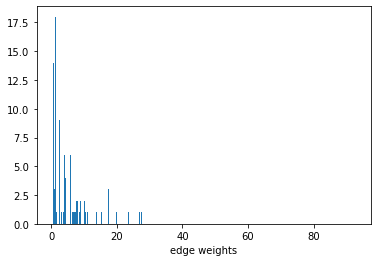

In [133]:
# PLOT WEIGHT DISTRIBUTION
edge_weights = []
for u, v, data in G.edges(data=True):
    edge_weights.append(data['weight'])

#plt.figure(figsize=(12,9))
plt.hist(edge_weights,500)
plt.xlabel('edge weights')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

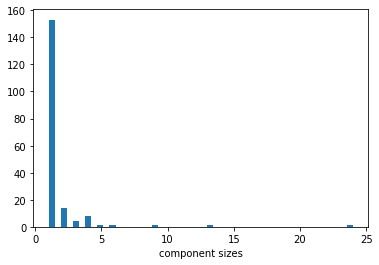

In [134]:
component_sizes = []
for component in nx.connected_components(G):
    component_sizes.append(len(component))

#plt.figure(figsize=(12,9))    
plt.hist(component_sizes,50)
plt.xlabel('component sizes')
plt.show

In [93]:
for component in nx.connected_components(G):
    print(component, '\n')

{'fatso jetson'} 

{'the smashing pumpkins', 'mr. bungle', 'jane’s addiction', 'ben harper', 'starship', 'fall out boy', 'timoria', 'ian paice', 'adam clayton', 'mick jagger', 'bill bruford', 'the shadows', 'ac/dc', 'miley cyrus', 'steve kilbey', 'francis rossi', 'shawn colvin', 'dominic miller', 'liam gallagher', 'walter trout', 'roger mcguinn', 'jack white', 'the black keys', 'vangelis', 'nuno bettencourt', 'sugar ray', 'warren zevon', 'iggy pop', 'love', 'jim kerr', 'elton john', 'hank marvin', 'rick wakeman', 'stillwater', 'maroon 5', 'tom petty and the heartbreakers', 'lonnie youngblood', 'roger waters', 'pink floyd', 'lou gramm', 'lynn carey saylor', 'journey', 'chicago', 'david bowie', 'don felder', 'dawes', 'kevin peek', 'vessels', 'elvis presley', 'tony sheridan', 'peter frampton', 'dhani harrison', 'mike oldfield', 'steve marriott', 'project rocket', 'yoko ono', 'chris wilson', 'elvin bishop', 'charlie watts', 'lenny kravitz', 'the dead', 'pearl jam', 'red rider', 'paul shaff

## Centrality

In [95]:
def print_top_n(G,v, num=5):
    thenodes = list(G.nodes())
    idx_list = [(i,v[i]) for i in range(len(v))]
    idx_list = sorted(idx_list, key = lambda x: x[1], reverse=True)
    for i in range(min(num,len(idx_list))):
        nidx, score = idx_list[i]
        print('  %i. %s (%1.4f)' % (i+1,thenodes[nidx],score))
        #print '  %i. %s' % (i+1,G.node_object(idx))

In [96]:
def index_of_max(v):
    return numpy.where(v == max(v))[0]

In [97]:
def centrality_vector(G,d):
    thenodes = list(G.nodes())
    v = np.zeros((G.number_of_nodes(),))
    for i,u in enumerate(thenodes):
        v[i] = d[u]
    return v

In [98]:
def node_index(G,n):
    thenodes = list(G.nodes())
    return thenodes.index(n)

### Degree Centrality

In [135]:
print('Degree Centrality:')

for n in G.nodes():
    G.nodes[n]['degree_centrality'] = G.degree(n, weight = 'weight')

deg_centrality_dict = dict(G.nodes(data='degree_centrality'))
deg_centrality_v = centrality_vector(G,deg_centrality_dict)

print_top_n(G,deg_centrality_v, num=10)

Degree Centrality:
  1. loretta lynn (131.3182)
  2. george jones (127.8333)
  3. tammy wynette (98.8182)
  4. conway twitty (97.5000)
  5. faron young (45.4000)
  6. merle haggard (44.1667)
  7. webb pierce (34.9000)
  8. mel tillis (34.9000)
  9. glen campbell (32.0000)
  10. don williams (31.4500)


### Eigenvector Centrality

In [100]:
print('Eigenvector Centrality (by NetworkX):')

nx_eig_centrality_dict = nx.eigenvector_centrality(G,weight='weight', max_iter=100)
nx_eig_centrality_v = centrality_vector(G,nx_eig_centrality_dict)

print_top_n(G,nx_eig_centrality_v, num=10)

Eigenvector Centrality (by NetworkX):


PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

### Katz Centrality

In [ ]:
k, v = la.eig(A)
k1_idx = index_of_max(k) # find the index of the largest eigenvalue
k_max = float(np.abs(k[k1_idx]))

alpha = (1/k_max)*.8
print('Katz Centrality (alpha = %1.5f):' % (alpha))

n = G.number_of_nodes()
beta = 1
beta_v = numpy.ones((n,1))*beta
I = numpy.eye(n)

la_katz_v = numpy.dot(la.inv((I-alpha*A)),beta_v)
print_top_n(G,la_katz_v, num=10)

### PageRank

In [ ]:
print('PageRank:')

n = G.number_of_nodes()
alpha = .85
beta = 1
beta_v = np.ones((n,1))*beta
I = np.eye(n)
D = np.zeros((n,n))
for i in range(n):
    D[i][i] = deg_centrality_v[i] if deg_centrality_v[i] > 1 else 1

la_pagerank_v = np.dot(la.inv(I-alpha*np.dot(A,la.inv(D))),beta_v)
print_top_n(G,la_pagerank_v, num=10)

PageRank:


### Betweenness Centrality

In [101]:
print('Betweenness Centrality')

nx_between_d = nx.betweenness_centrality(G,weight='weight')
nx_between_v = centrality_vector(G,nx_between_d)
print_top_n(G,nx_between_v, num=10)

Betweenness Centrality
  1. eric clapton (0.0170)
  2. chrissie hynde (0.0159)
  3. jon bon jovi (0.0131)
  4. bonnie tyler (0.0125)
  5. jackson browne (0.0107)
  6. sting (0.0105)
  7. paul mccartney (0.0098)
  8. david bowie (0.0086)
  9. ozzy osbourne (0.0079)
  10. mike oldfield (0.0076)


## Fitting Power Law

In [136]:
def degree_sequence(G):
    return [d for n, d in G.degree()]

def degree_distribution(G,normalize=True):
    deg_sequence = degree_sequence(G)
    max_degree = max(deg_sequence)
    ddist = np.zeros((max_degree+1,))
    for d in deg_sequence:
        ddist[d] += 1
    if normalize:
        ddist = ddist/float(G.number_of_nodes())
    return ddist

def cumulative_degree_distribution(G):
    ddist = degree_distribution(G)
    cdist = [ ddist[k:].sum()  for k in range(len(ddist)) ] 
    return cdist

In [137]:
def calc_powerlaw(G,kmin=None):
    ddist = degree_distribution(G,normalize=False)
    cdist = cumulative_degree_distribution(G)
    k = np.arange(len(ddist))
    
    degs_over_thresh = [deg for deg in degree_sequence(G) if deg>=kmin]
    N = len(degs_over_thresh)
    alpha_inner_sum = 0
    for deg in degs_over_thresh:
        alpha_inner_sum += np.log(deg/(kmin-.5))
    alpha = 1+N*(alpha_inner_sum)**-1 # calculate using Newman (8.6)!
    
    sigma = (alpha - 1)/np.sqrt(N) # calculate using Newman (8.7)!
    print( '%1.2f +/- %1.2f' % (alpha,sigma) )
    
    
    plt.figure(figsize=(8,12))
    plt.subplot(211)
    plt.bar(k,ddist, width=0.8, bottom=0, color='b') # replace xvalues and barheights!
    axes = plt.gca()
    axes.autoscale()

    plt.subplot(212)
    plt.loglog(k,cdist) # replace xvalues and yvalues!
    plt.grid(True)
    axes = plt.gca()
    axes.autoscale()

6.39 +/- 1.62


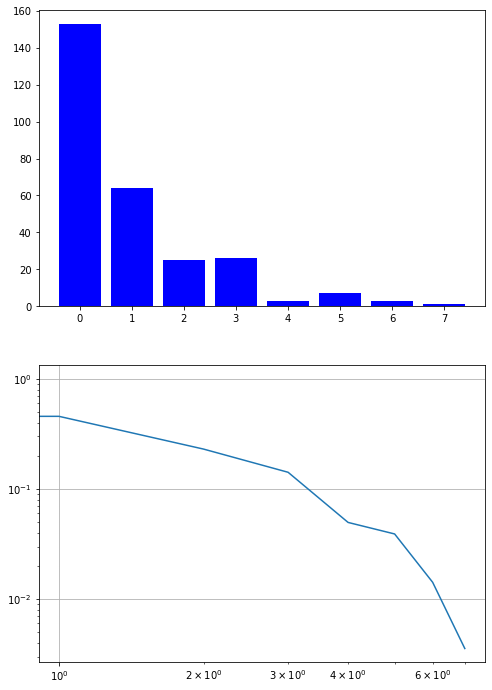

In [138]:
kmin1 = 5
calc_powerlaw(G, kmin1) # select kmin!
plt.show()

### Degree Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

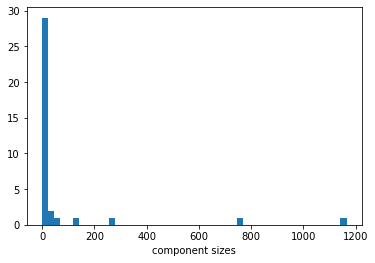

In [105]:
deg_dist = degree_distribution(G, normalize=False)

#plt.figure(figsize=(12,9))
plt.hist(deg_dist,50)
plt.xlabel('component sizes')
plt.show

## Modularity & Assortativity, Partitioning & Community Detection

In [139]:
def modularity(G,d):

    L = 0
    for u,v,data in G.edges.data():
        L += data['weight']
    Q, Qmax = 0,1
    counter=0
    count_max = G.number_of_nodes()**2
    for u in G.nodes():
        for v in G.nodes():
            if d[u] == d[v]:
                Auv = 0
                if G.has_edge(v,u):
                    Auv = G[v][u]['weight']
                Q += ( Auv - G.degree(u,weight='weight')*G.degree(v,weight='weight')/L )/L
                Qmax -= ( G.degree(u,weight='weight')*G.degree(v,weight='weight')/L )/L
            counter+=1
            if counter % int(count_max/100) == 0:
                print(f'progress: {counter}/{count_max}', end='\r', flush=True)
    return Q, Qmax

def scalar_assortativity(G,d):
    x = np.zeros(G.number_of_nodes())
    for i,n in enumerate(G.nodes()):
        x[i] = d[n]

    A = np.array(nx.adjacency_matrix(G).todense().T)
    M = 2*A.sum().sum()
    ki = A.sum(axis=1) #row sum is in-degree
    ko = A.sum(axis=0) #column sum is out-degree
    mu = ( np.dot(ki,x)+np.dot(ko,x) )/M
    
    counter=0
    count_max = G.number_of_nodes()**2
    R, Rmax = 0, 0
    for i in range(G.number_of_nodes()):
        for j in range(G.number_of_nodes()):
            R += ( A[i,j]*(x[i]-mu)*(x[j]-mu) )/M
            Rmax += ( A[i,j]*(x[i]-mu)**2 )/M
            counter+=1
            if counter % int(count_max/100) == 0:
                print(f'progress: {counter}/{count_max}', end='\r', flush=True)

    return R, Rmax

In [107]:
#dict_keys(['country_mb', 'tags_mb', 'listeners_lastfm'])

### Modularity

In [173]:
Q, Qmax = modularity(G,artist_attrs['country_mb'])
print('Artist collaboration by Country is assortatively mixed: %1.4f/%1.4f' % (Q,Qmax))

Artist collaboration by Country is assortatively mixed: 0.2959/0.3477


In [174]:
Q, Qmax = modularity(G,artist_attrs['tags_mb'])
print('Artist collaboration by Country is assortatively mixed: %1.4f/%1.4f' % (Q,Qmax))

Artist collaboration by Country is assortatively mixed: 0.0507/-0.4318


### Scalar Assortativity for Popularity

In [175]:
R, Rmax =  scalar_assortativity(G,artist_attrs['listeners_lastfm'])
print('Assortativity by Popularity: %1.4f' % (R/Rmax))

Assortativity by Popularity: 0.3130


### Community Detection

In [185]:
G_copy = copy.deepcopy(G)

# filter out low-weight edges
wTHRESHOLD = 10

edges_to_remove = []
for u,v,data in G_copy.edges(data=True):
    if data['weight'] < wTHRESHOLD:
        edges_to_remove.append((u,v))
        
G_copy.remove_edges_from(edges_to_remove)

edge_weights = []
for u,v,data in G_copy.edges(data=True):
    edge_weights.append(data['weight'])

# filter out small components
cTHRESHOLD = 20

nodes_to_remove = []
for component in nx.connected_components(G_copy):
    if len(component) < cTHRESHOLD:
        for node in component:
            nodes_to_remove.append(node)
        
G_copy.remove_nodes_from(nodes_to_remove)

component_sizes = []
for component in nx.connected_components(G_copy):
        component_sizes.append(len(component))
    
#plt.hist(component_sizes,20)
#plt.xlabel('component sizes')
#plt.show()

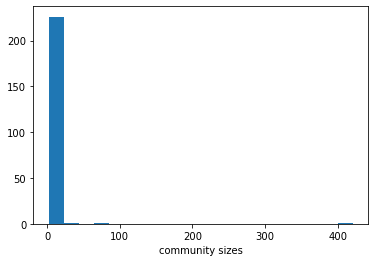

In [186]:
# detect communities
cset = list(nx_comm.label_propagation_communities(G_copy))

# get a list of sizes of detected communities
comm_sizes = []
for comm in cset:
    comm_sizes.append(len(comm))
    
plt.hist(comm_sizes,20)
plt.xlabel('community sizes')
plt.show()

In [187]:
comm_filename = 'all_artists_communities.txt'
with open(comm_filename, 'w', encoding='utf-8') as fout:
    for line in cset:
        line = map(lambda x: x + ' - ', line)  # add spaces after list items
        fout.writelines(line)
        fout.write('\n')